In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression
from sklearn.svm import SVC
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
from datetime import date, datetime

In [60]:
import seaborn as sns

### Load Top 3 Cryptos

In [3]:
# Bitcoin
df_btc = pd.read_csv('cryptodata/coin_Bitcoin.csv')
df_btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
# Ethereum
df_eth = pd.read_csv('cryptodata/coin_Ethereum.csv')
df_eth.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [5]:
# Cardano
df_ada = pd.read_csv('cryptodata/coin_Cardano.csv')
df_ada.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [6]:
df_btc.info()
df_eth.info()
df_ada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4

### Load Meme Cryptocurrency - Dogecoin

In [7]:
# Dogecoin
df_dog = pd.read_csv('cryptodata/coin_Dogecoin.csv')
df_dog.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [8]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2760 non-null   int64  
 1   Name       2760 non-null   object 
 2   Symbol     2760 non-null   object 
 3   Date       2760 non-null   object 
 4   High       2760 non-null   float64
 5   Low        2760 non-null   float64
 6   Open       2760 non-null   float64
 7   Close      2760 non-null   float64
 8   Volume     2760 non-null   float64
 9   Marketcap  2760 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 215.8+ KB


### EDA Top 3 Cryptos - BTC, ETH, ADA

In [9]:
### Convert Date column to datetime type
df_btc['Date'] = pd.to_datetime(df_btc['Date'])
df_eth['Date'] = pd.to_datetime(df_eth['Date'])
df_ada['Date'] = pd.to_datetime(df_ada['Date'])
df_dog['Date'] = pd.to_datetime(df_dog['Date'])

# check the format of 'Date' column
df_btc.info()
df_eth.info()
df_ada.info()
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2991 non-null   int64         
 1   Name       2991 non-null   object        
 2   Symbol     2991 non-null   object        
 3   Date       2991 non-null   datetime64[ns]
 4   High       2991 non-null   float64       
 5   Low        2991 non-null   float64       
 6   Open       2991 non-null   float64       
 7   Close      2991 non-null   float64       
 8   Volume     2991 non-null   float64       
 9   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 233.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2160 non-null   int64        

In [10]:
# Drop all numeric columns and volum columns

# BTC
df_btc.drop(columns=['SNo', 'Name', 'Symbol', 'Volume'], inplace=True)

# ETH
df_eth.drop(columns=['SNo', 'Name', 'Symbol', 'Volume'], inplace=True)

# ADA
df_ada.drop(columns=['SNo', 'Name', 'Symbol', 'Volume'], inplace=True)

# DOG
df_dog.drop(columns=['SNo', 'Name', 'Symbol', 'Volume'], inplace=True)

In [11]:
# Set date as the index column
df_btc.set_index('Date', inplace=True)
df_eth.set_index('Date', inplace=True)
df_ada.set_index('Date', inplace=True)
df_dog.set_index('Date', inplace=True)

In [12]:
df_btc.head()

,High,Low,Open,Close,Marketcap
Date,,,,,
2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,1.603769e+09
2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,1.542813e+09
2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,1.298955e+09
2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,1.168517e+09
2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,1.085995e+09


In [13]:
df_eth.head()

,High,Low,Open,Close,Marketcap
Date,,,,,
2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,4.548689e+07
2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,4.239957e+07
2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.281836e+07
2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,6.456929e+07
2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,7.364501e+07


In [14]:
df_ada.head()

,High,Low,Open,Close,Marketcap
Date,,,,,
2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,6.288991e+08
2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,5.396927e+08
2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,5.686195e+08
2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5.571390e+08
2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,4.806646e+08


In [15]:
df_dog.head()

,High,Low,Open,Close,Marketcap
Date,,,,,
2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,1.509085e+06
2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,2.169688e+06
2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,3.188943e+06
2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,1.115034e+07
2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,7.284337e+06


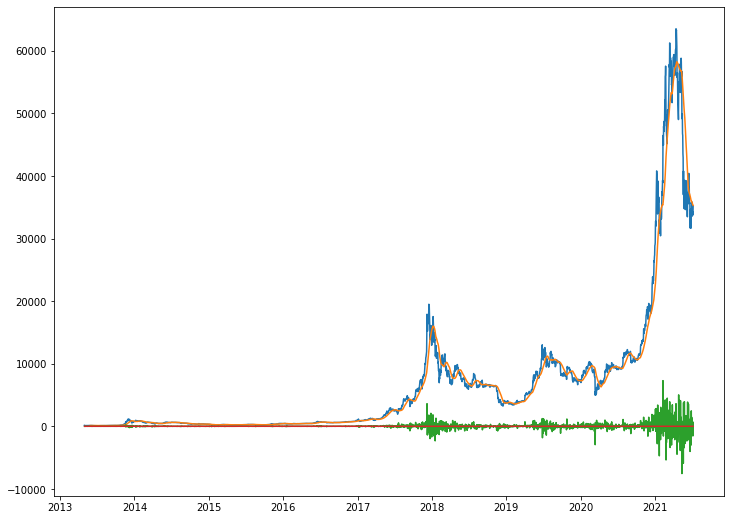

In [90]:
plt.figure(figsize=(12, 9))
plt.plot(df_btc['Close']) #blue line
plt.plot(df_btc['Close'].rolling(30).mean())  #orange line
plt.plot(df_btc['Close'].diff()) #green line
plt.plot(df_btc['Close'].pct_change()) #red line

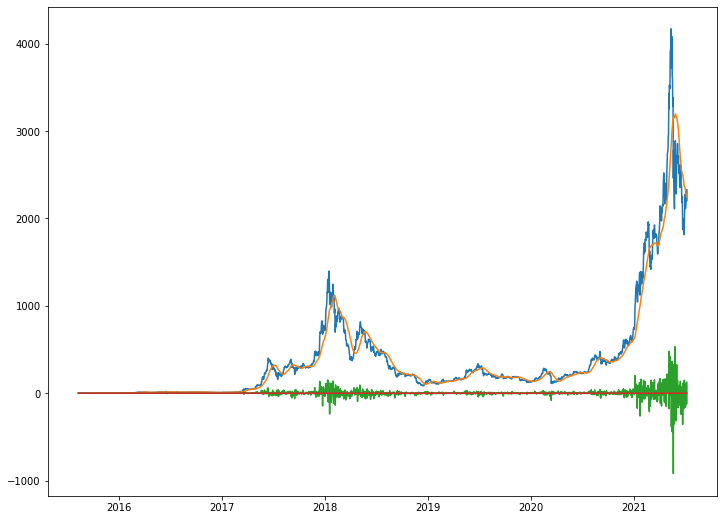

In [81]:
plt.figure(figsize=(12, 9))
plt.plot(df_eth['Close'])
plt.plot(df_eth['Close'].rolling(30).mean())
plt.plot(df_eth['Close'].diff())
plt.plot(df_eth['Close'].pct_change())

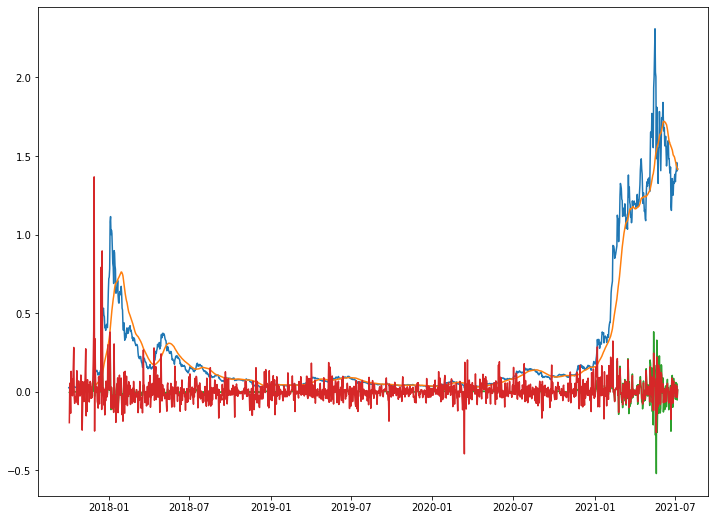

In [82]:
plt.figure(figsize=(12, 9))
plt.plot(df_ada['Close'])
plt.plot(df_ada['Close'].rolling(30).mean())
plt.plot(df_ada['Close'].diff())
plt.plot(df_ada['Close'].pct_change())

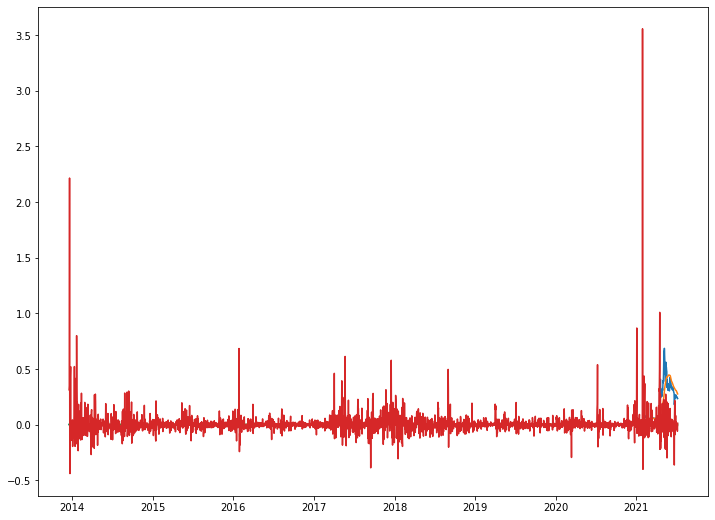

In [83]:
plt.figure(figsize=(12, 9))
plt.plot(df_dog['Close'])
plt.plot(df_dog['Close'].rolling(30).mean())
plt.plot(df_dog['Close'].diff())
plt.plot(df_dog['Close'].pct_change())

### Fit all 4 coins in one plot

In [89]:
from sklearn import preprocessing

In [98]:
# standarize BTC
X_btc = df_btc.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled_btc = min_max_scaler.fit_transform(X_btc)
df_btc_ss = pd.DataFrame(X_scaled_btc)
# create rolling average / 30-days moving average for column index 3 (that's the original Closing price)
df_btc_ss[5] = df_btc_ss[3].rolling(30).mean()
df_btc_ss.dropna(inplace=True)

# standarize ETH
X_eth = df_eth.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled_eth = min_max_scaler.fit_transform(X_eth)
df_eth_ss = pd.DataFrame(X_scaled_eth)
# create rolling average / 30-days moving average for column index 3 (that's the original Closing price)
df_eth_ss[5] = df_eth_ss[3].rolling(30).mean()
df_eth_ss.dropna(inplace=True)

# standarize ADA
X_ada = df_ada.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled_ada = min_max_scaler.fit_transform(X_ada)
df_ada_ss = pd.DataFrame(X_scaled_ada)
# create rolling average / 30-days moving average for column index 3 (that's the original Closing price)
df_ada_ss[5] = df_ada_ss[3].rolling(30).mean()
df_ada_ss.dropna(inplace=True)

# standarize DOG
X_dog = df_dog.values
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled_dog = min_max_scaler.fit_transform(X_dog)
df_dog_ss = pd.DataFrame(X_scaled_dog)
# create rolling average / 30-days moving average for column index 3 (that's the original Closing price)
df_dog_ss[5] = df_dog_ss[3].rolling(30).mean()
df_dog_ss.dropna(inplace=True)

In [101]:
df_dog_ss

,0,1,2,3,4,5
29,0.000359,0.000313,0.000278,0.000372,0.000091,0.000472
30,0.000477,0.000420,0.000370,0.000476,0.000118,0.000483
31,0.000464,0.000469,0.000474,0.000434,0.000111,0.000488
32,0.000451,0.000477,0.000431,0.000479,0.000125,0.000491
33,0.000755,0.000544,0.000478,0.000731,0.000189,0.000463
...,...,...,...,...,...,...
2755,0.336156,0.392649,0.354646,0.358084,0.360262,0.429151
2756,0.339162,0.398579,0.356279,0.359760,0.362017,0.421676
2757,0.342353,0.400175,0.358198,0.359865,0.362161,0.415355
2758,0.334017,0.374542,0.358189,0.338149,0.340349,0.408512


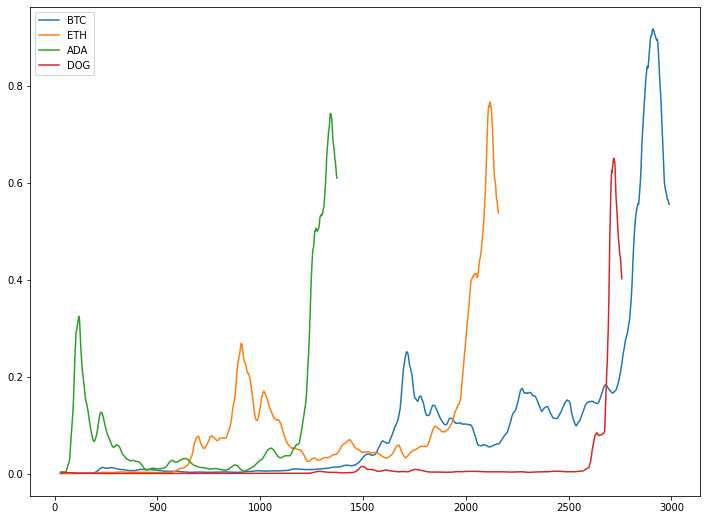

In [100]:
plt.figure(figsize=(12, 9))
plt.plot(df_btc_ss[5], label='BTC')
plt.plot(df_eth_ss[5], label='ETH')
plt.plot(df_ada_ss[5], label='ADA')
plt.plot(df_dog_ss[5], label='DOG')
plt.legend()

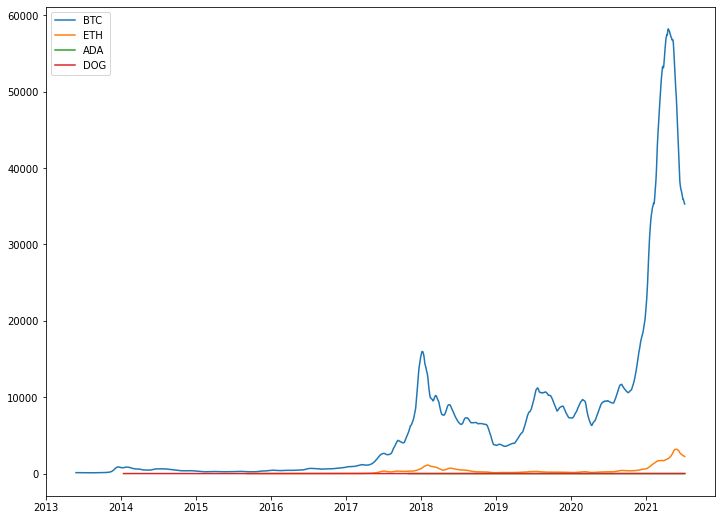

In [87]:
plt.figure(figsize=(12, 9))
plt.plot(df_btc['Close'].rolling(30).mean(), label='BTC')
plt.plot(df_eth['Close'].rolling(30).mean(), label='ETH')
plt.plot(df_ada['Close'].rolling(30).mean(), label='ADA')
plt.plot(df_dog['Close'].rolling(30).mean(), label='DOG')
plt.legend()

### Export new cleaned data to csv

In [20]:
df_btc.to_csv('data/df_btc.csv')

In [21]:
df_eth.to_csv('data/df_eth.csv')
df_ada.to_csv('data/df_ada.csv')
df_dog.to_csv('data/df_dog.csv')

### Compare Correlation

In [50]:
df = df_btc[['Close']].join(df_eth[['Close']], lsuffix='_left', rsuffix='_right')
df.rename(columns={'Close_left': 'BTC_close', 'Close_right': 'ETH_close'}, inplace=True)
df

,BTC_close,ETH_close
Date,,
2013-04-29 23:59:59,144.539993,NaN
2013-04-30 23:59:59,139.000000,NaN
2013-05-01 23:59:59,116.989998,NaN
2013-05-02 23:59:59,105.209999,NaN
2013-05-03 23:59:59,97.750000,NaN
...,...,...
2021-07-02 23:59:59,33897.048590,2150.040364
2021-07-03 23:59:59,34668.548402,2226.114282
2021-07-04 23:59:59,35287.779766,2321.724112


In [56]:
df2 = df.join(df_ada[['Close']], lsuffix='_left', rsuffix='_right')
df2.rename(columns={'Close': 'ADA_close'}, inplace=True)
df2

,BTC_close,ETH_close,ADA_close
Date,,,
2013-04-29 23:59:59,144.539993,NaN,NaN
2013-04-30 23:59:59,139.000000,NaN,NaN
2013-05-01 23:59:59,116.989998,NaN,NaN
2013-05-02 23:59:59,105.209999,NaN,NaN
2013-05-03 23:59:59,97.750000,NaN,NaN
...,...,...,...
2021-07-02 23:59:59,33897.048590,2150.040364,1.394397
2021-07-03 23:59:59,34668.548402,2226.114282,1.406836
2021-07-04 23:59:59,35287.779766,2321.724112,1.458184


In [71]:
df3 = df2.join(df_dog[['Close']], lsuffix='_left', rsuffix='_right')
df3.rename(columns={'Close': 'DOG_close'}, inplace=True)
df3

,BTC_close,ETH_close,ADA_close,DOG_close
Date,,,,
2013-04-29 23:59:59,144.539993,NaN,NaN,NaN
2013-04-30 23:59:59,139.000000,NaN,NaN,NaN
2013-05-01 23:59:59,116.989998,NaN,NaN,NaN
2013-05-02 23:59:59,105.209999,NaN,NaN,NaN
2013-05-03 23:59:59,97.750000,NaN,NaN,NaN
...,...,...,...,...
2021-07-02 23:59:59,33897.048590,2150.040364,1.394397,0.245264
2021-07-03 23:59:59,34668.548402,2226.114282,1.406836,0.246411
2021-07-04 23:59:59,35287.779766,2321.724112,1.458184,0.246483


In [72]:
df3 = df3.fillna('0')
df3

,BTC_close,ETH_close,ADA_close,DOG_close
Date,,,,
2013-04-29 23:59:59,144.539993,0,0,0
2013-04-30 23:59:59,139.000000,0,0,0
2013-05-01 23:59:59,116.989998,0,0,0
2013-05-02 23:59:59,105.209999,0,0,0
2013-05-03 23:59:59,97.750000,0,0,0
...,...,...,...,...
2021-07-02 23:59:59,33897.048590,2150.04,1.3944,0.245264
2021-07-03 23:59:59,34668.548402,2226.11,1.40684,0.246411
2021-07-04 23:59:59,35287.779766,2321.72,1.45818,0.246483


In [73]:
df3.reset_index(drop=True, inplace=True)
df3

,BTC_close,ETH_close,ADA_close,DOG_close
0,144.539993,0,0,0
1,139.000000,0,0,0
2,116.989998,0,0,0
3,105.209999,0,0,0
4,97.750000,0,0,0
...,...,...,...,...
2986,33897.048590,2150.04,1.3944,0.245264
2987,34668.548402,2226.11,1.40684,0.246411
2988,35287.779766,2321.72,1.45818,0.246483
2989,33746.002456,2198.58,1.4049,0.231614


In [77]:
df3['ETH_close'] = df3['ETH_close'].astype(float, errors = 'raise')
df3['ADA_close'] = df3['ADA_close'].astype(float, errors = 'raise')
df3['DOG_close'] = df3['DOG_close'].astype(float, errors = 'raise')

In [78]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_close  2991 non-null   float64
 1   ETH_close  2991 non-null   float64
 2   ADA_close  2991 non-null   float64
 3   DOG_close  2991 non-null   float64
dtypes: float64(4)
memory usage: 93.6 KB


Text(0.5, 1.0, 'Correlation Between BTC, ETH, ADA, DOG')

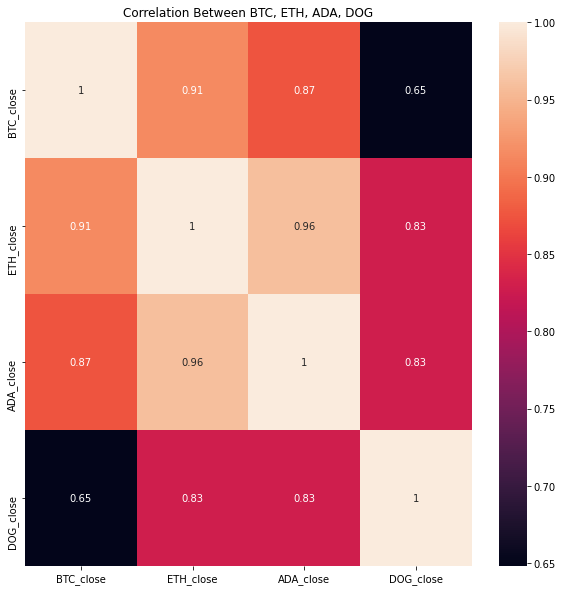

In [79]:
plt.figure(figsize=(10, 10))
sns.heatmap(df3.corr(), annot=True)
plt.title('Correlation Between BTC, ETH, ADA, DOG')

In [105]:
df3.corr()

,BTC_close,ETH_close,ADA_close,DOG_close
BTC_close,1.000000,0.914318,0.874325,0.648138
ETH_close,0.914318,1.000000,0.959165,0.828309
ADA_close,0.874325,0.959165,1.000000,0.828663
DOG_close,0.648138,0.828309,0.828663,1.000000


### Summary

It is apparent that all 4 cryptocurrencies have high correlation with each other with the exception of Bitcoin and Dogecoin. Hence, we are comfortable to do further price and sentiment analysis on Bitcoin along.

### Export cleaned data

In [104]:
df_btc.to_csv('cryptodata/cleaned_btc.csv')
df_eth.to_csv('cryptodata/cleaned_eth.csv')
df_ada.to_csv('cryptodata/cleaned_ada.csv')
df_dog.to_csv('cryptodata/cleaned_dog.csv')
df3.to_csv('cryptodata/3coinsclose.csv', index=False)

In [80]:
df_btc.tail(5)

,High,Low,Open,Close,Marketcap
Date,,,,,
2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,6.354508e+11
2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,6.499397e+11
2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,6.615748e+11
2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,6.326962e+11
2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,6.418992e+11


In [81]:
df_eth.tail(5)

,High,Low,Open,Close,Marketcap
Date,,,,,
2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,2.505527e+11
2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,2.594475e+11
2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,2.706217e+11
2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.562978e+11
2021-07-06 23:59:59,2346.294874,2197.919385,2197.919385,2324.679449,2.710286e+11


In [82]:
df_ada.tail(5)

,High,Low,Open,Close,Marketcap
Date,,,,,
2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,4.454587e+10
2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,4.494324e+10
2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,4.658364e+10
2021-07-05 23:59:59,1.461221,1.379284,1.461221,1.404898,4.488134e+10
2021-07-06 23:59:59,1.456887,1.393282,1.404712,1.418053,4.530158e+10


In [83]:
df_dog.tail(5)

,High,Low,Open,Close,Marketcap
Date,,,,,
2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,3.194925e+10
2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,3.210491e+10
2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,3.211767e+10
2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,3.018344e+10
2021-07-06 23:59:59,0.241910,0.229842,0.231216,0.234422,3.055252e+10
